## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  49.899091  1329.215513  0.406020  5.570448  1.502318
1   5.824579   887.478529  0.899943  8.750045  1.420525
2  16.626229   573.158378  0.810687  4.852120  1.659774
3  34.018990  1230.389198  0.792082  9.081529  1.687986
4  57.290620   596.394582  0.966848  3.378391  1.483467


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.81371 | train_mse: 6.43993 | train_mae: 1.63273 |  0:00:00s
epoch 1  | loss: 0.89231 | train_mse: 3.54911 | train_mae: 1.26873 |  0:00:00s
epoch 2  | loss: 0.69121 | train_mse: 3.05435 | train_mae: 1.24971 |  0:00:00s


epoch 3  | loss: 0.50759 | train_mse: 2.46498 | train_mae: 1.12932 |  0:00:00s
epoch 4  | loss: 0.49501 | train_mse: 2.03632 | train_mae: 1.05111 |  0:00:00s
epoch 5  | loss: 0.2671  | train_mse: 1.81613 | train_mae: 0.97883 |  0:00:00s


epoch 6  | loss: 0.33146 | train_mse: 1.51739 | train_mae: 0.89614 |  0:00:00s
epoch 7  | loss: 0.34896 | train_mse: 1.15685 | train_mae: 0.83622 |  0:00:00s
epoch 8  | loss: 0.24155 | train_mse: 1.02733 | train_mae: 0.78155 |  0:00:00s


epoch 9  | loss: 0.39131 | train_mse: 0.81787 | train_mae: 0.68302 |  0:00:00s
epoch 10 | loss: 0.33396 | train_mse: 0.91048 | train_mae: 0.70358 |  0:00:00s
epoch 11 | loss: 0.35186 | train_mse: 0.83303 | train_mae: 0.64302 |  0:00:01s


epoch 12 | loss: 0.26373 | train_mse: 0.47349 | train_mae: 0.51901 |  0:00:01s
epoch 13 | loss: 0.31916 | train_mse: 0.39867 | train_mae: 0.49689 |  0:00:01s
epoch 14 | loss: 0.21222 | train_mse: 0.4063  | train_mae: 0.48874 |  0:00:01s


epoch 15 | loss: 0.24114 | train_mse: 0.32358 | train_mae: 0.44908 |  0:00:01s
epoch 16 | loss: 0.24543 | train_mse: 0.39953 | train_mae: 0.4861  |  0:00:01s


epoch 17 | loss: 0.20904 | train_mse: 0.3453  | train_mae: 0.44816 |  0:00:01s
epoch 18 | loss: 0.25675 | train_mse: 0.2969  | train_mae: 0.42576 |  0:00:01s
epoch 19 | loss: 0.30397 | train_mse: 0.28147 | train_mae: 0.42005 |  0:00:01s


epoch 20 | loss: 0.42291 | train_mse: 0.19448 | train_mae: 0.3735  |  0:00:01s
epoch 21 | loss: 0.19936 | train_mse: 0.24677 | train_mae: 0.39082 |  0:00:01s
epoch 22 | loss: 0.19421 | train_mse: 0.23984 | train_mae: 0.38691 |  0:00:02s


epoch 23 | loss: 0.15608 | train_mse: 0.15444 | train_mae: 0.31876 |  0:00:02s
epoch 24 | loss: 0.1064  | train_mse: 0.11227 | train_mae: 0.27726 |  0:00:02s


epoch 25 | loss: 0.11874 | train_mse: 0.13245 | train_mae: 0.29389 |  0:00:02s
epoch 26 | loss: 0.10746 | train_mse: 0.268   | train_mae: 0.36787 |  0:00:02s
epoch 27 | loss: 0.35737 | train_mse: 0.29529 | train_mae: 0.37522 |  0:00:02s


epoch 28 | loss: 0.39257 | train_mse: 0.23663 | train_mae: 0.36038 |  0:00:02s


epoch 29 | loss: 0.20001 | train_mse: 0.18006 | train_mae: 0.31467 |  0:00:03s
epoch 30 | loss: 0.14504 | train_mse: 0.1569  | train_mae: 0.30102 |  0:00:03s


epoch 31 | loss: 0.13231 | train_mse: 0.14768 | train_mae: 0.30606 |  0:00:03s
epoch 32 | loss: 0.24405 | train_mse: 0.12939 | train_mae: 0.28589 |  0:00:03s
epoch 33 | loss: 0.35066 | train_mse: 0.12341 | train_mae: 0.27692 |  0:00:03s


epoch 34 | loss: 0.17751 | train_mse: 0.12957 | train_mae: 0.28915 |  0:00:03s
epoch 35 | loss: 0.10325 | train_mse: 0.12218 | train_mae: 0.28495 |  0:00:03s
epoch 36 | loss: 0.27459 | train_mse: 0.11248 | train_mae: 0.27577 |  0:00:03s
epoch 37 | loss: 0.19134 | train_mse: 0.10689 | train_mae: 0.26809 |  0:00:03s


epoch 38 | loss: 0.14554 | train_mse: 0.10211 | train_mae: 0.26166 |  0:00:03s
epoch 39 | loss: 0.16304 | train_mse: 0.10122 | train_mae: 0.26063 |  0:00:03s
epoch 40 | loss: 0.16977 | train_mse: 0.1219  | train_mae: 0.28412 |  0:00:03s
epoch 41 | loss: 0.13151 | train_mse: 0.13879 | train_mae: 0.29663 |  0:00:03s


epoch 42 | loss: 0.16    | train_mse: 0.15325 | train_mae: 0.28734 |  0:00:03s
epoch 43 | loss: 0.10806 | train_mse: 0.13489 | train_mae: 0.26521 |  0:00:04s
epoch 44 | loss: 0.22401 | train_mse: 0.12232 | train_mae: 0.26304 |  0:00:04s


epoch 45 | loss: 0.13027 | train_mse: 0.0864  | train_mae: 0.23204 |  0:00:04s
epoch 46 | loss: 0.14056 | train_mse: 0.09328 | train_mae: 0.23656 |  0:00:04s
epoch 47 | loss: 0.14734 | train_mse: 0.12988 | train_mae: 0.27685 |  0:00:04s


epoch 48 | loss: 0.23125 | train_mse: 0.12198 | train_mae: 0.27346 |  0:00:04s
epoch 49 | loss: 0.11669 | train_mse: 0.10831 | train_mae: 0.26321 |  0:00:04s
epoch 50 | loss: 0.1055  | train_mse: 0.08775 | train_mae: 0.23694 |  0:00:04s
epoch 51 | loss: 0.10007 | train_mse: 0.08615 | train_mae: 0.23051 |  0:00:04s


epoch 52 | loss: 0.23852 | train_mse: 0.08632 | train_mae: 0.22376 |  0:00:04s
epoch 53 | loss: 0.10521 | train_mse: 0.09134 | train_mae: 0.23225 |  0:00:04s
epoch 54 | loss: 0.13196 | train_mse: 0.09116 | train_mae: 0.23403 |  0:00:04s
epoch 55 | loss: 0.2707  | train_mse: 0.08482 | train_mae: 0.22408 |  0:00:04s


epoch 56 | loss: 0.13042 | train_mse: 0.09411 | train_mae: 0.23286 |  0:00:04s
epoch 57 | loss: 0.16471 | train_mse: 0.12581 | train_mae: 0.26752 |  0:00:05s
epoch 58 | loss: 0.12674 | train_mse: 0.14365 | train_mae: 0.27998 |  0:00:05s
epoch 59 | loss: 0.15765 | train_mse: 0.13848 | train_mae: 0.287   |  0:00:05s


epoch 60 | loss: 0.1757  | train_mse: 0.13112 | train_mae: 0.27669 |  0:00:05s
epoch 61 | loss: 0.22989 | train_mse: 0.10884 | train_mae: 0.26059 |  0:00:05s
epoch 62 | loss: 0.18157 | train_mse: 0.10162 | train_mae: 0.25636 |  0:00:05s
epoch 63 | loss: 0.17207 | train_mse: 0.10564 | train_mae: 0.25965 |  0:00:05s


epoch 64 | loss: 0.15003 | train_mse: 0.1079  | train_mae: 0.26386 |  0:00:05s
epoch 65 | loss: 0.13728 | train_mse: 0.0996  | train_mae: 0.24855 |  0:00:05s
epoch 66 | loss: 0.10812 | train_mse: 0.09969 | train_mae: 0.25024 |  0:00:05s
epoch 67 | loss: 0.14987 | train_mse: 0.09591 | train_mae: 0.24519 |  0:00:05s


epoch 68 | loss: 0.13634 | train_mse: 0.10053 | train_mae: 0.25506 |  0:00:05s
epoch 69 | loss: 0.08763 | train_mse: 0.09851 | train_mae: 0.23955 |  0:00:05s
epoch 70 | loss: 0.1172  | train_mse: 0.09871 | train_mae: 0.24159 |  0:00:05s
epoch 71 | loss: 0.17612 | train_mse: 0.11839 | train_mae: 0.26371 |  0:00:05s


epoch 72 | loss: 0.158   | train_mse: 0.1383  | train_mae: 0.28391 |  0:00:06s
epoch 73 | loss: 0.17743 | train_mse: 0.12675 | train_mae: 0.27065 |  0:00:06s
epoch 74 | loss: 0.15734 | train_mse: 0.10916 | train_mae: 0.25274 |  0:00:06s


epoch 75 | loss: 0.13446 | train_mse: 0.09772 | train_mae: 0.25338 |  0:00:06s
epoch 76 | loss: 0.10307 | train_mse: 0.09042 | train_mae: 0.24723 |  0:00:06s
epoch 77 | loss: 0.23835 | train_mse: 0.11868 | train_mae: 0.26693 |  0:00:06s
epoch 78 | loss: 0.15998 | train_mse: 0.28138 | train_mae: 0.32081 |  0:00:06s


epoch 79 | loss: 0.16076 | train_mse: 0.38307 | train_mae: 0.35649 |  0:00:06s
epoch 80 | loss: 0.1867  | train_mse: 0.4275  | train_mae: 0.37323 |  0:00:06s
epoch 81 | loss: 0.2279  | train_mse: 0.36902 | train_mae: 0.36062 |  0:00:06s
epoch 82 | loss: 0.20004 | train_mse: 0.29874 | train_mae: 0.33965 |  0:00:06s


epoch 83 | loss: 0.3032  | train_mse: 0.22736 | train_mae: 0.32889 |  0:00:06s
epoch 84 | loss: 0.17949 | train_mse: 0.21109 | train_mae: 0.31473 |  0:00:06s
epoch 85 | loss: 0.22868 | train_mse: 0.25884 | train_mae: 0.3288  |  0:00:06s


epoch 86 | loss: 0.18159 | train_mse: 0.31166 | train_mae: 0.34777 |  0:00:06s
epoch 87 | loss: 0.11705 | train_mse: 0.27409 | train_mae: 0.32825 |  0:00:07s
epoch 88 | loss: 0.24831 | train_mse: 0.24524 | train_mae: 0.33143 |  0:00:07s
epoch 89 | loss: 0.17478 | train_mse: 0.2339  | train_mae: 0.34838 |  0:00:07s


epoch 90 | loss: 0.16434 | train_mse: 0.29224 | train_mae: 0.37786 |  0:00:07s
epoch 91 | loss: 0.24421 | train_mse: 0.34302 | train_mae: 0.38739 |  0:00:07s
epoch 92 | loss: 0.18071 | train_mse: 0.33062 | train_mae: 0.37741 |  0:00:07s
epoch 93 | loss: 0.21782 | train_mse: 0.36232 | train_mae: 0.38516 |  0:00:07s


epoch 94 | loss: 0.14524 | train_mse: 0.22686 | train_mae: 0.34796 |  0:00:07s
epoch 95 | loss: 0.17178 | train_mse: 0.14109 | train_mae: 0.29842 |  0:00:07s
epoch 96 | loss: 0.12616 | train_mse: 0.10959 | train_mae: 0.26703 |  0:00:07s
epoch 97 | loss: 0.21047 | train_mse: 0.10068 | train_mae: 0.25611 |  0:00:07s


epoch 98 | loss: 0.18304 | train_mse: 0.10368 | train_mae: 0.26389 |  0:00:07s
epoch 99 | loss: 0.24199 | train_mse: 0.11959 | train_mae: 0.27239 |  0:00:07s
epoch 100| loss: 0.17465 | train_mse: 0.13417 | train_mae: 0.28009 |  0:00:07s
epoch 101| loss: 0.19482 | train_mse: 0.18783 | train_mae: 0.31076 |  0:00:08s


epoch 102| loss: 0.13611 | train_mse: 0.19837 | train_mae: 0.31463 |  0:00:08s

Early stopping occurred at epoch 102 with best_epoch = 52 and best_train_mae = 0.22376
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

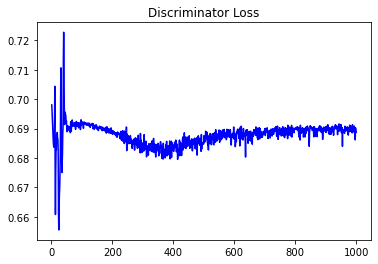

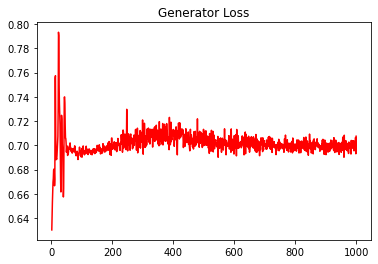

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.21947571272659175


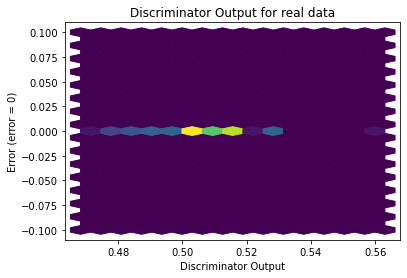

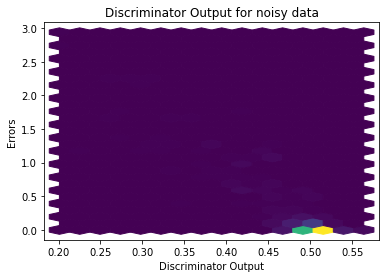

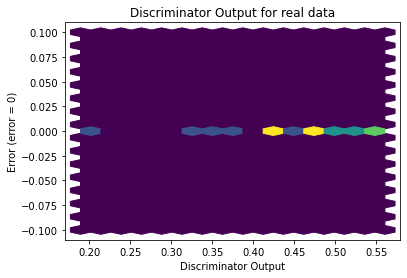

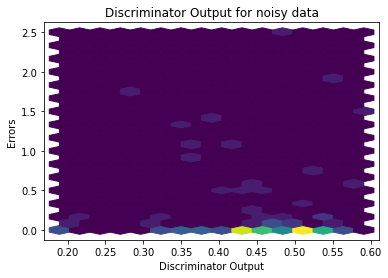

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


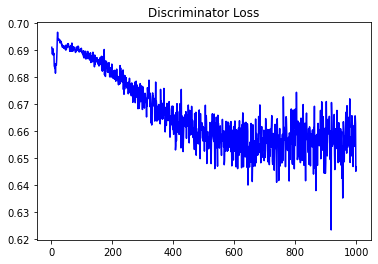

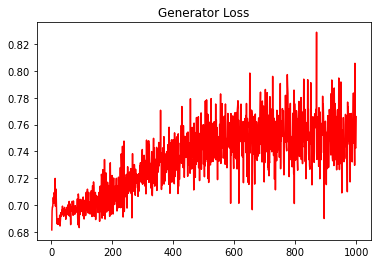

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2974166077664322


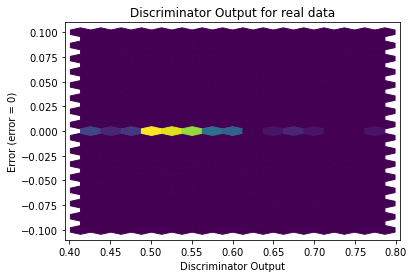

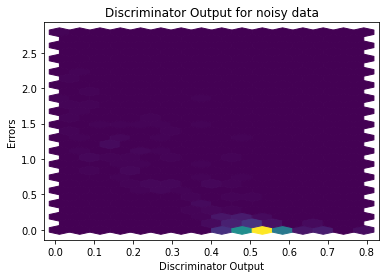

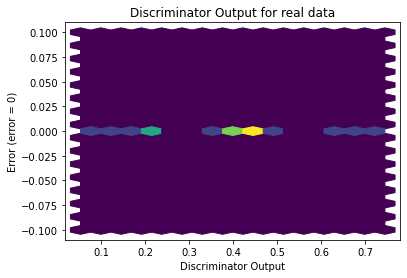

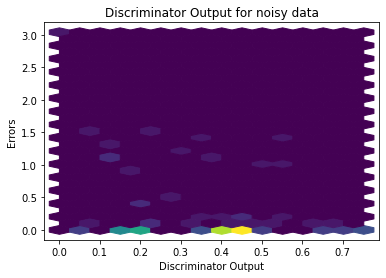

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1460]], requires_grad=True)
